# $W^2$ Simulator

In [ ]:
# Import the relevant libraries

import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Set graph parameters 
scale = 0.65

plt.rcParams.update({
    'font.size': 20,
    'figure.figsize': (16*scale, 9*scale),
    'lines.linewidth': 2.5,
    'axes.linewidth':1.5    
})

For this problem we will consider deep inelastic scattering (DIS), $e^- p \rightarrow e^- X$,  at EIC kinematics. The incoming electron and CM energy will be:

$$E_e  = 15 \: GeV $$
$$\sqrt{s}= 80 \: GeV $$

We will consider a uniform distribution in the scattered electron energy from 1 to 15 GeV. We will also take a uniform distribiton in the cosine of the scattered electron angle, $\cos (\theta)$, from -1 to 1.

In [3]:
# Set up variables (working in GeV)

E_e = 15                 # Incoming e energy
E_T = 106.6543           # Incoming target energy
m_T = 0.938              # Take proton as target

s = (E_e + E_T)**2 - (E_e -  np.sqrt(E_T**2 - m_T**2) )**2  #Mandelstam s / CM energy
np.sqrt(s)

80.00008811994032

In [122]:
#Uniformly randomly distribute E_e_prime and cos theta
exp = 5             # Exponent

N_events = 10**exp  # Number of events we'll generate
N_bins = 100        # Number of bins used (gotten purely empircally)

E_e_prime = np.random.uniform(1,E_e, N_events)
cos_th_e = np.random.uniform(-1.,1, N_events)

theta_e = (180/np.pi)*np.arccos(cos_th_e)  # Get theta in degrees

We can get expected distribution for $\theta$ looking at: 
$$ Pr(\theta =\Theta) = \int_{-1}^1 d\gamma\ Pr(\gamma) δ(\Theta-arccos⁡γ ) $$

$$ Pr(\theta =\Theta) = \int_{-1}^1 d\gamma\ \frac{1}{2} δ(\Theta-arccos⁡γ ) $$

$$= \int_{-1}^1 d\gamma\ \frac{1}{2} \frac{δ(γ-cos⁡\Theta )}{(d arccos⁡γ)/dγ |_{γ=cos\Theta} } $$
$$= \int_{-1}^1 d\gamma\ \frac{1}{2} \frac{δ(γ-cos⁡\Theta )}{\frac{1}{\sqrt(1-cos^2\Theta\ )} } = \frac{1}{2} \sin (\Theta)$$

Alternatively, we can look at the Jacobian and get the same result:

$$P(\cos \theta ) d \cos \theta  = P(\cos \theta ) |\frac{d \cos \theta}{d \theta}| d \theta = \frac{1}{2} \sin (\Theta) d\theta $$

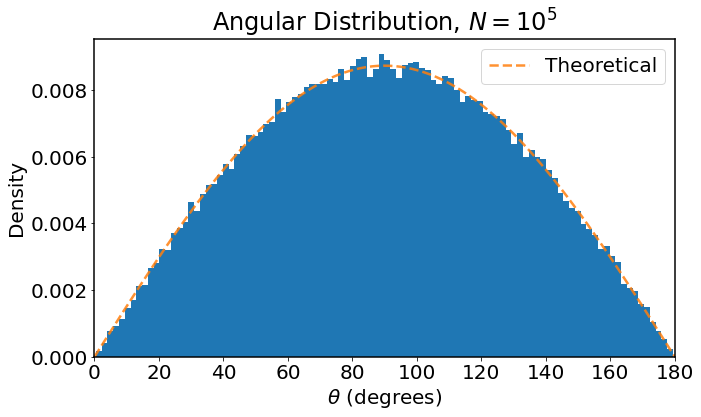

In [106]:
plt.hist(theta_e,  N_bins, density = True)

xax = np.linspace(0,180, 300)
angle_theoretical = 0.5*(np.pi/180)*np.sin(xax*(np.pi/180))                         #Convert to degrees
plt.plot(xax, angle_theoretical, label = 'Theoretical', ls='--', alpha =0.85)


plt.xlim(0,180)
plt.xlabel(r'$\theta $ (degrees)')
plt.ylabel('Density')
plt.title(f'Angular Distribution, $ N= 10^{ {exp} }$')
plt.legend()
plt.savefig('EIC DIS - Angular Distribution.png', dpi=300)

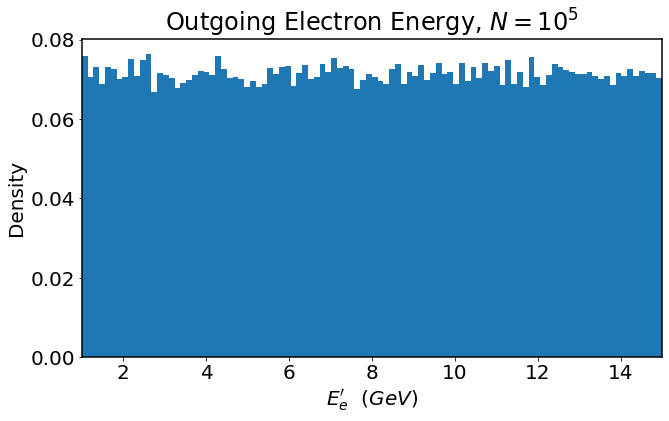

In [105]:
plt.hist(E_e_prime, N_bins, density = True)


plt.xlabel('$E_e^{\prime}  \ \ (GeV)$')
plt.ylabel('Density')
plt.xlim(1,E_e)


plt.title(f'Outgoing Electron Energy, $ N= 10^{ {exp} }$')
plt.savefig('EIC DIS - Scattered Electron Distr.png', dpi=300)

If we're interested in the $Q^2$ distribution we need integrate the probability density over $E_e'$ and $cos(\theta)$ such that $Q^2 = 2 E_e E_e' ( 1- cos(\theta)):$

$$Pr (Q^2=Q_0^2) = \int_{-1}^1 dz \int_1^{E_e} dy Pr \left(cos(\theta) = z  ,  E_e' = y \right) \: \delta \left(2 E_e y(1-z) -Q_0^2 \right)$$
$$Pr (Q^2=Q_0^2) = \int_{-1}^1 dz \int_0^{E_e} \frac{1}{2} \frac{1}{E_e-1} \delta (2 E_e y(1-z) -Q_0^2 )  $$

The upper constraint for $y$ becomes:

$$ \frac{Q_0^2}{2E_e(1-z)} \leq E_e \rightarrow    z \leq 1- \frac{Q_0^2}{2E_e^2}$$


The lower constraint for $y$ becomes:

$$ 1 GeV \leq \frac{Q_0^2}{2E_e(1-z)}  \rightarrow    1-\frac{Q_0^2}{2E_e (1 GeV)} \leq  z$$


When $\frac{Q_0^2}{2E_e(1 GeV)} > 2$ then the $z>-1$ limit is automatically satisfed. Then,
$$Pr (Q^2=Q_0^2) = \frac{1}{4 E_e (E_e-1)} \int_{max\{-1, 1-\frac{Q_0^2}{2E_e (1 GeV)} \}}^{1- \frac{Q_0^2}{2E_e^2}} dz \frac{1}{1-z}  $$



Solving we get:

$$Pr (Q^2=Q_0^2) =  \frac{1}{4 E_e (E_e-1)}\log \bigg(    \frac{1-max\{-1, 1-\frac{Q_0^2}{2E_e (1 GeV)}\} } {\frac{Q_0^2}{2E_e^2}} \bigg)  $$

$$  =  \frac{1}{4 E_e (E_e-1)}\log \bigg(    \frac{min\{4E_e^2, \frac{E_e Q_0^2}{(1 GeV)}\} } {Q_0^2} \bigg)  $$


$$= \begin{cases}
 \frac{1}{4 E_e (E_e-1)}  \log \big(\frac{4E_e^2}{Q_0^2}   \big), & Q_0^2>4 E_e (1 GeV) \\
\frac{1}{4 E_e (E_e-1)}   \log \big(\frac{E_e}{1 GeV}   \big), & Q_0^2<4 E_e (1 GeV)\\
\end{cases}$$

Note, if we made no assumption about the probability distribution of $\cos \theta$ and $E_e'$ then we would have: 

$$Pr (Q^2=Q_0^2) = \frac{1}{4 E_e^2} \int_{max\{-1, 1-\frac{Q_0^2}{2E_e (1 GeV)} \}}^{1- \frac{Q_0^2}{2E_e^2}} dz \frac{1}{1-z}   Pr \left( cos(\theta) = z  ,  E_e' = \frac{Q_0^2}{2 E_e (1-z)} \right)$$

In [108]:
# Make the Q^2 theoretical function and Get Q^2 from E_e' and cos theta. 

def Q_theoretical_func(q2):
    if q2 > 4*E_e:
        return 1./(4*E_e*(E_e-1))*np.log ((4*E_e**2) /q2)
    else:
        return 1./(4*E_e*(E_e-1))*np.log (E_e)
    
Q2 = 2*E_e*E_e_prime*(1-cos_th_e)

xax = np.linspace(Q2.min(), Q2.max(), 300)
Q2_theoretical = np.array( [Q_theoretical_func(q2)  for q2 in xax])

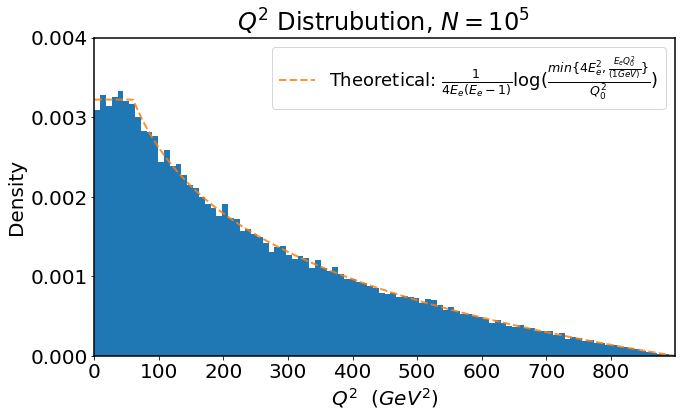

In [125]:
plt.hist(Q2, N_bins, density =True)

plt.plot(xax,Q2_theoretical, lw = 2, label = r'Theoretical: $ \frac{1}{4 E_e (E_e-1)}\log (    \frac{min\{4E_e^2, \frac{E_e Q_0^2}{(1 GeV)}\} } {Q_0^2} ) $', 
         ls='--', alpha =0.85)


plt.title( f'$Q^2$ Distrubution, $ N= 10^{ {exp} }$ ')
plt.xlabel('$Q^2  \ \ (GeV^2)$')
plt.ylabel('Density')

plt.xlim(0,Q2.max())
plt.ylim(0,0.004)

plt.legend(fontsize=18)
plt.savefig('EIC DIS - Q2 Distribution.png', dpi=300)

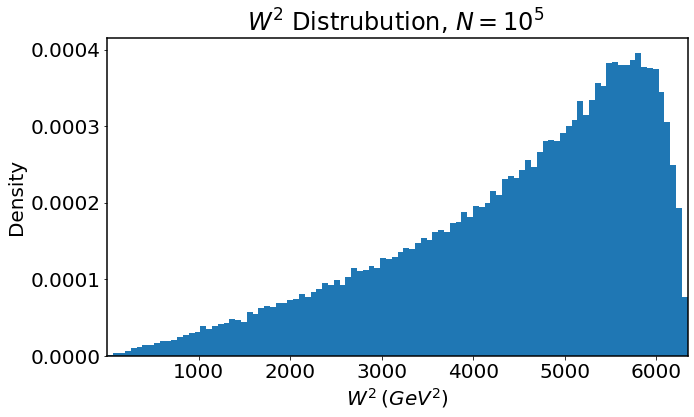

In [110]:
W2 = m_T**2 + 2*E_T*(E_e-E_e_prime) + 2*(E_e - E_e_prime*cos_th_e)*np.sqrt(E_T**2-m_T**2) - 2*E_e*E_e_prime*(1-cos_th_e)
plt.hist(W2, N_bins, density =True)

plt.title( f'$W^2$ Distrubution, $ N= 10^{ {exp} }$ ')
plt.xlabel('$W^2  \:(GeV^2)$')
plt.ylabel('Density')

plt.xlim(m_T,W2.max())
plt.savefig('EIC DIS - W2 Distr.png', dpi=300)

For the hadronic invariant mass we have:

$$W^2 = (p+q)^2 = m_T^2 +2 p \cdot q + q^2 $$

$$W^2=m_T^2+2E_T\ (E_e-E_e^\prime\ \ )+2\sqrt(E_T^2-m_T^2 ) (E_e-E_e^\prime\ \cos\theta\ )-2E_e\ E_e^\prime\ (1-\cos\theta)$$

A similiar calculation for the theoretical distibutrion for $W^2$, but I haven't done it.

## Bjorken x

Bjorken $x$ represents the momentum fraction the struck parton was carrying. Now, using the defintion of Bjorken x,

$$x =  \frac{Q^2 }{2 p_T\cdot q}$$
$$x =  \frac{Q^2 }{(p_T+q)^2 - p_T^2- q^2}$$
$$x =  \frac{Q^2 }{W^2 - M_T^2 +Q^2}$$

we can express it in terms of distribution we already have.

In [111]:
x= Q2/ (W2+Q2-m_T**2)

Text(0.5, 0, 'x')

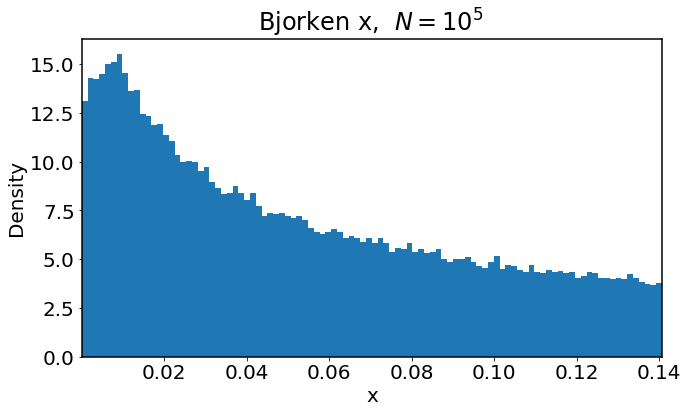

In [118]:
plt.hist(x,N_bins, density = True)
plt.title(f'Bjorken x,  $ N= 10^{ {exp} } $ ' )
plt.xlim(x.min(),x.max())
plt.ylabel('Density')
plt.xlabel('x')

## 2D Histograms

Since the variables $x$ and $Q^2$ are both Lorentz invariants and commonly used in DIS, we'll see how the data is distributed in them.

Text(0.5, 1.0, '$ N= 10^{5} $ ')

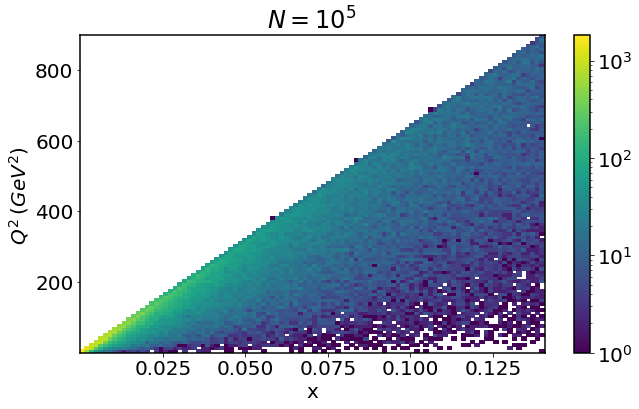

In [119]:
import matplotlib as mpl
plt.hist2d(x, Q2, N_bins, norm=mpl.colors.LogNorm())
plt.colorbar()
plt.xlabel('x')
plt.ylabel('$Q^2 \: (GeV^2)$ ')
plt.title(f'$ N= 10^{ {exp} } $ ' )

#plt.xscale('log')
#plt.yscale('log')

Since most the data is highly concentrated, it's a good idea to use log scales on the axes.

Text(0.5, 1.0, '  $ N= 10^{5} $ ')

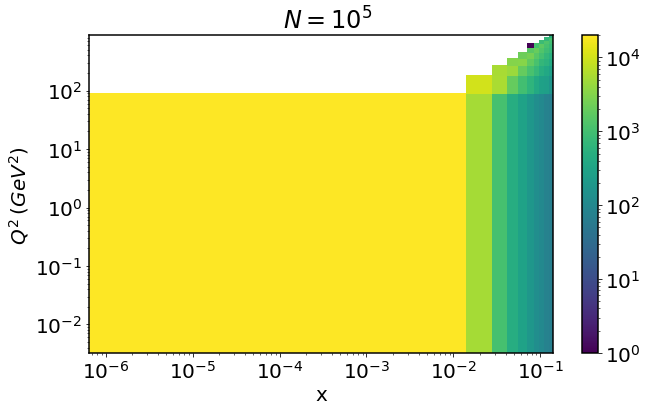

In [120]:
  import matplotlib as mpl
plt.hist2d(x, Q2,  
          norm=mpl.colors.LogNorm()
          )
plt.colorbar()
plt.xlabel('x')
plt.ylabel('$Q^2 \: (GeV^2)$ ')
plt.xscale('log')
plt.yscale('log')
plt.title(f'  $ N= 10^{ {exp} } $ ' )

Alternate binning

Text(0.5, 1.0, '$ N= 10^{5} $ ')

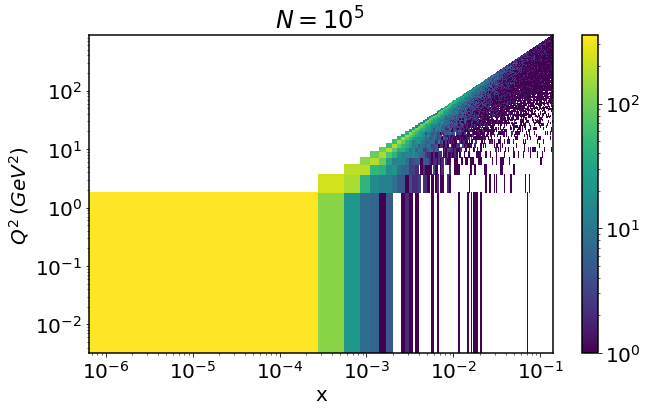

In [121]:
  import matplotlib as mpl
plt.hist2d(x, Q2,  5*N_bins,
          norm=mpl.colors.LogNorm(),
        
          )
plt.colorbar()
plt.xlabel('x')
plt.ylabel('$Q^2 \: (GeV^2)$ ')
plt.xscale('log')
plt.yscale('log')

plt.title(f'$ N= 10^{ {exp} } $ ' )

We can compare the above with results from DIS kinematics given at the [EIC wiki hosted by BNL](https://wiki.bnl.gov/eic/index.php/DIS_Kinematics#Q2_and_Bjorken_x_coverage)

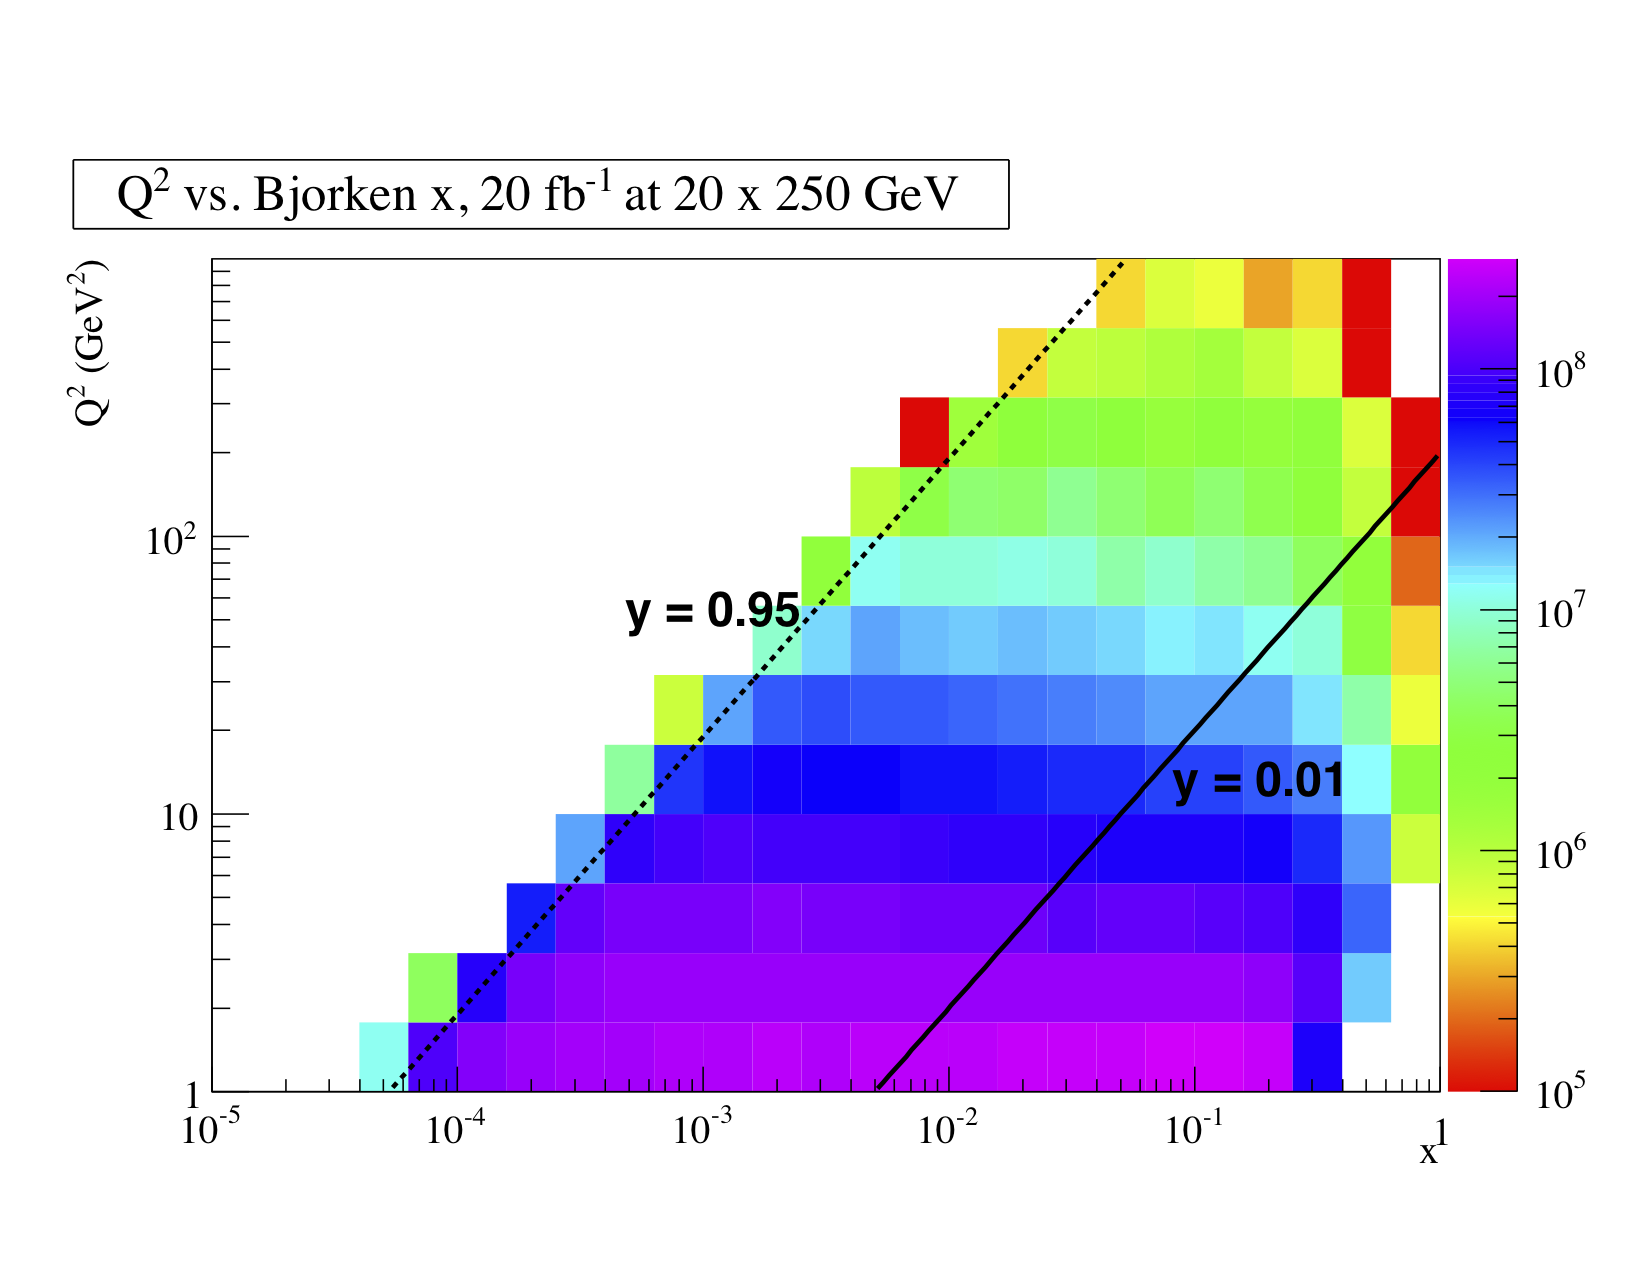

I was unable to recreate above, probably because they're using something other than unifrom distribution for $\cos \theta$ and $E_e'$. Taking though their initial conditions of:
$$ E_e = 20 \: GeV $$
$$ E_T = 250 \: GeV $$
and then making uniform distributions of:
$$ -0.95 \leq \cos \theta \leq 0.95$$
$$ 0.5 \leq E_e' \leq 20 \: GeV$$

we can somewhat qualitatively recreate something kinda close, where most the data is at low $Q^2$, starts at $Q^2 \sim 1 \: GeV$ and goes as low as $x \sim 10^{-4}$.

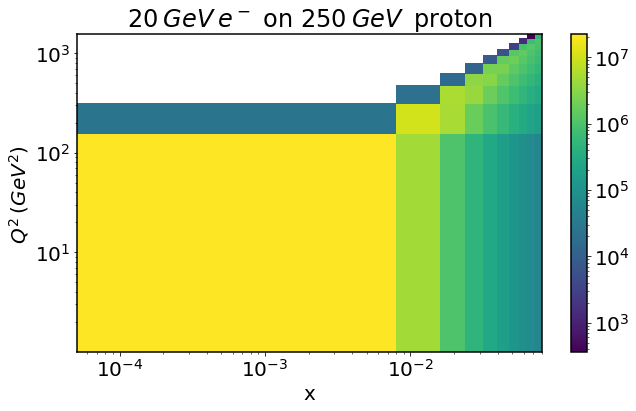

Note: this was done on seperate notebook.

# Playing around with Seaborn

Playing around with the seaborn library. This can be ignored if you choose.

In [13]:
import seaborn as sns

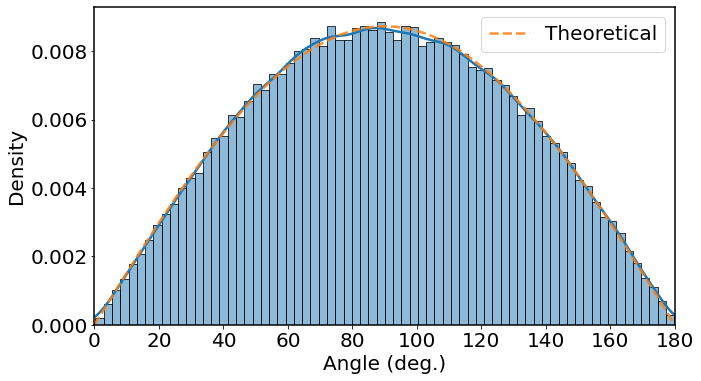

In [45]:
sns.histplot(theta_e,  kde = True, stat = 'density')

xax = np.linspace(0,180, 300)
plt.plot(xax, angle_theoretical, label = 'Theoretical', ls='--', alpha =0.85, color = 'C1')
plt.xlabel('Angle (deg.)')
plt.xlim(0,180)
plt.legend()

Text(0.5, 0, 'x')

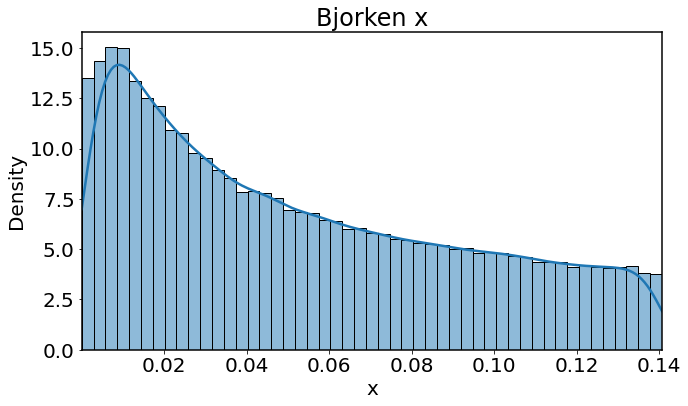

In [46]:

sns.histplot(x,  kde = True, stat = 'density', label ='Test')
plt.title('Bjorken x')
plt.xlim(x.min(),x.max())
plt.xlabel('x')

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


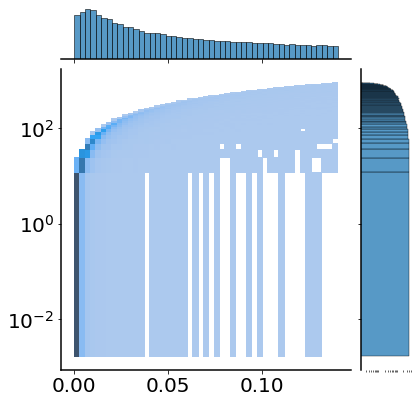

In [53]:
sns.jointplot(x, Q2, kind="hist")

plt.yscale('log')
plt.xscale('log')

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(336.9714285714286, 0.5, '$Q^2 \\: (GeV^2)$')

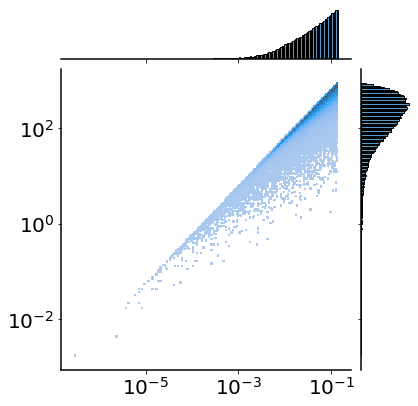

In [63]:
sns.jointplot(x, Q2, kind="hist", log_scale =True)
plt.xlabel('x')
plt.ylabel('$Q^2 \: (GeV^2)$')
